In [370]:
using Plots
include("./phys2func.jl")

# 物理　第1編　第4章 第2節　慣性力　(p72)

##  慣性力

電車の中に小球をつりさげ、電車を加速させることを考える。

In [371]:
# 電車を加速度運動させることを考える

mutable struct Train
    len::Float64
    hight::Float64
    x::Float64
    vel::Float64
    accs::Float64
    t::Float64
    xhis::Array{Float64,1}
    velhis::Array{Float64,1}
    accshis::Array{Float64,1}
    timehis::Array{Float64,1}
    function Train(accs;len=20,hight=10,x=0,vel=0,t=0)
        xhis = Float64[]
        velhis= Float64[]
        timehis=Float64[]
        accshis=Float64[]
        timehis=Float64[]
        push!(xhis,x)
        push!(velhis,vel)
        push!(accshis,accs)
        push!(timehis,0)
        return new(len,hight,x,vel,accs,t,xhis,velhis,accshis,timehis)
    end
end

In [372]:
function update!(train::Train;dt=1/20) # trainの等加速度運動を時間発展させる
    x=train.x 
    v=train.vel 
    a=train.accs 
    t=train.t 
    newx = x + v*dt
    newv = v + a*dt
    newt = t + dt
    train.x  =newx#更新
    train.vel = newv
    train.accs = a
    train.t =newt
    push!(train.xhis,newx)
    push!(train.velhis,newv)
    push!(train.timehis,newt)
    push!(train.accshis,a)
end

update! (generic function with 1 method)

In [373]:
train1 =Train(0.1)

Train(20.0, 10.0, 0.0, 0.0, 0.1, 0.0, [0.0], [0.0], [0.1], [0.0])

In [374]:
for i in 1:1
    update!(train1)
end

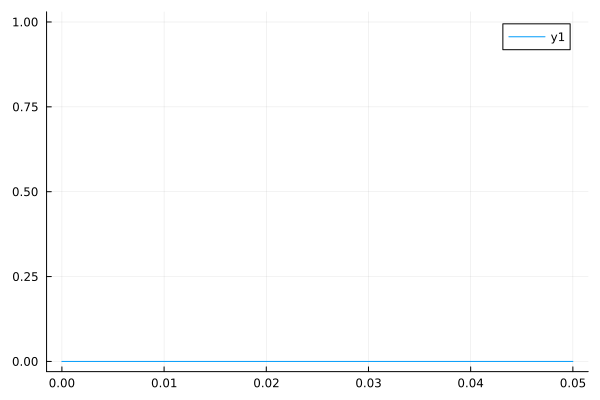

In [375]:
plot(train1.timehis,train1.xhis)

In [376]:
function show(train::Train)
    l = train.len
    h = train.hight
    x= train.x
    v = train.vel
    a = train.accs
    t = train.t
    lens=range(0,l/2,step=0.1)
    heigts=range(0,h/2,step=0.1)
    plot(x.+lens,0.5 .+0 .*lens,color=:blue,xlims=(-10,100),ylims=(0,20),label="t=$(t)",aspectratio=1)
    plot!(x.-lens,0.5 .+0 .*lens,color=:blue,label="")
    plot!(x.-lens,h .+0 .*lens,color=:blue,label="")
    plot!(x.+lens,h .+0 .*lens,color=:blue,label="")
    plot!(0*heigts .+(x+l/2),heigts,color=:blue,label="") # 縦の壁を描く
    plot!(0*heigts .+(x+l/2),2*heigts,color=:blue,label="") # 縦の壁を描く
    plot!(0*heigts .+(x-l/2),heigts,color=:blue,label="") # 縦の壁を描く
    plot!(0*heigts .+(x-l/2),2*heigts,color=:blue,label="") # 縦の壁を描く
end

show (generic function with 1 method)

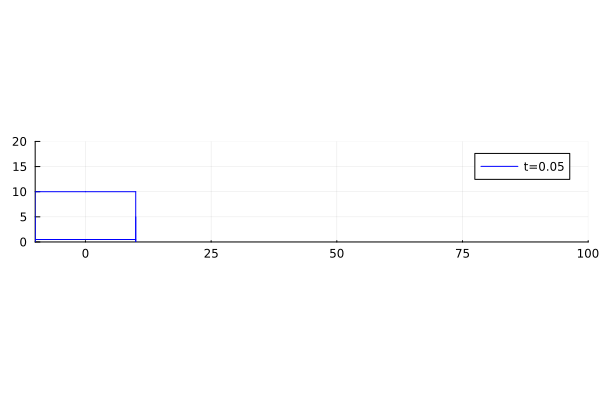

In [377]:
show(train1)

┌ Info: Saved animation to /var/folders/b5/z2qg52p549x8sbr6138wf9w00000gn/T/jl_SNwRqzw7Ev.gif
└ @ Plots /Users/busseirironibarakidaigaku/.julia/packages/Plots/esM5q/src/animation.jl:156


Plots.AnimatedGif("/var/folders/b5/z2qg52p549x8sbr6138wf9w00000gn/T/jl_SNwRqzw7Ev.gif")
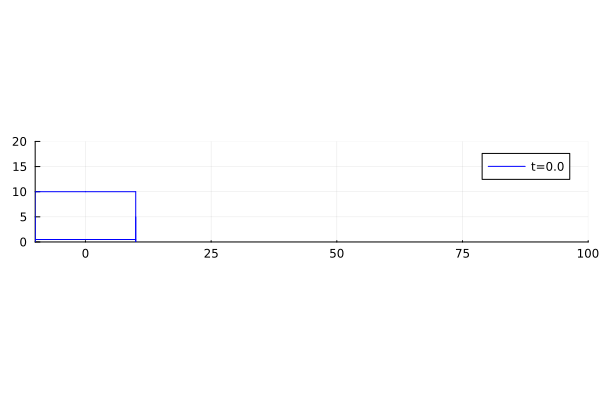

In [381]:
train2=Train(10)
anim=Animation()
for i in 1:100
    plt=show(train2)
    frame(anim,plt)
    update!(train2)
end
gif(anim,fps=20)

(慣性力の資料はここらへんで中断しておく)